### **`Batch-vs-stochastic-Gradient Descent`**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/fram

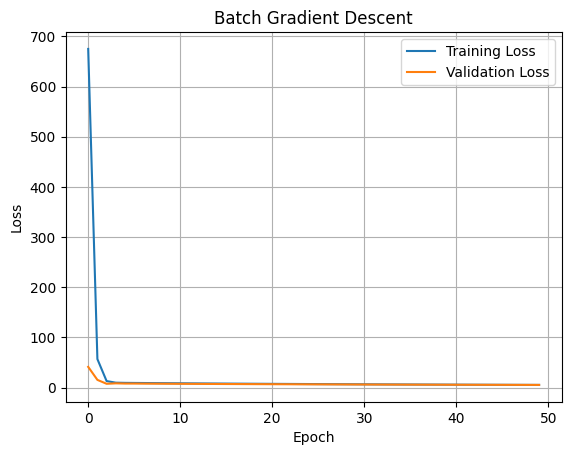

Final weights - Batch Gradient Descent:
Weight (slope): 3.2777
Bias (intercept): 2.8104
--------------------------------------------------


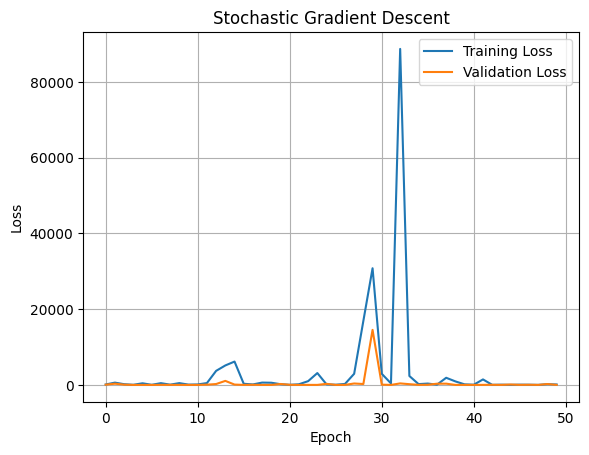

Final weights - Stochastic Gradient Descent:
Weight (slope): 3.2906
Bias (intercept): 5.6106
--------------------------------------------------


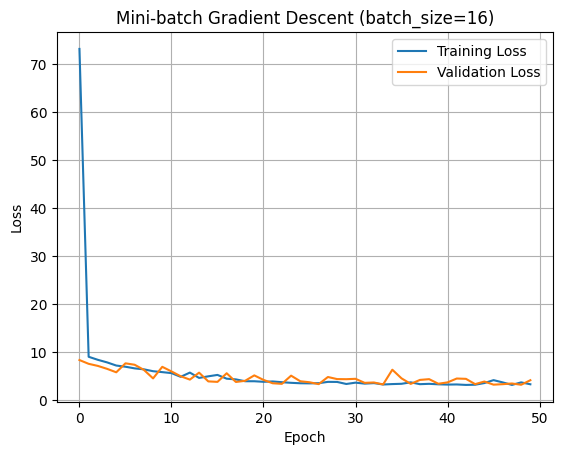

Final weights - Mini-batch Gradient Descent (batch_size=16):
Weight (slope): 2.8817
Bias (intercept): 5.2176
--------------------------------------------------


In [6]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features between 0 and 10
y = 3 * X + 5 + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Split into train and test
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Create a simple linear regression model
def build_model():
    model = keras.Sequential([
        layers.Dense(1, input_shape=(1,))
    ])
    return model

# Function to train and plot results
def train_and_plot(batch_size, title):
    model = build_model()
    
    # Use a fixed learning rate for comparison
    optimizer = SGD(learning_rate=0.02)
    
    model.compile(optimizer=optimizer, loss='mse')
    
    # Store loss history for plotting
    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=50,
        verbose=0,
        validation_data=(X_test, y_test))
    
    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print final weights
    weights = model.layers[0].get_weights()
    print(f"Final weights - {title}:")
    print(f"Weight (slope): {weights[0][0][0]:.4f}")
    print(f"Bias (intercept): {weights[1][0]:.4f}")
    print("-" * 50)

# Batch Gradient Descent (batch_size = entire dataset)
train_and_plot(batch_size=len(X_train), title="Batch Gradient Descent")

# Stochastic Gradient Descent (batch_size = 1)
train_and_plot(batch_size=1, title="Stochastic Gradient Descent")

# Mini-batch Gradient Descent (compromise between batch and stochastic)
train_and_plot(batch_size=16, title="Mini-batch Gradient Descent (batch_size=16)")